## Introduction
---
- We have a dataset containing information about a mall's customers and their spending scores.
- The goal is to cluster the customers based on their features.

- Our dataset contains:
    - CustomerID : ID assigned to the customer
    - Gender : Gender of the customer
    - Age : Age of the customer
    - Annual Income (k$) : Annual Income of the customer
    - Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

## Initial libraries and functions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN

## Exploratory data analysis (EDA)
---
- Dataset looks clean, doesn't require cleaning that much.

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum(), df.duplicated().sum()

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
 0)

### Proprocessing
- Dropping `customerID`
- Renaming fields for easier access
- Changing types to float64

In [5]:
df.drop('CustomerID', axis='columns', inplace=True)

df.rename(
    {
        'Annual Income (k$)' : 'income',
        'Spending Score (1-100)' : 'score'
    },
    axis='columns',
    inplace=True
)
df.rename(str.lower, axis='columns', inplace=True)

df[['age', 'income', 'score']] = df[['age', 'income', 'score']].astype('float64')

df.head()

,gender,age,income,score
0,Male,19.0,15.0,39.0
1,Male,21.0,15.0,81.0
2,Female,20.0,16.0,6.0
3,Female,23.0,16.0,77.0
4,Female,31.0,17.0,40.0


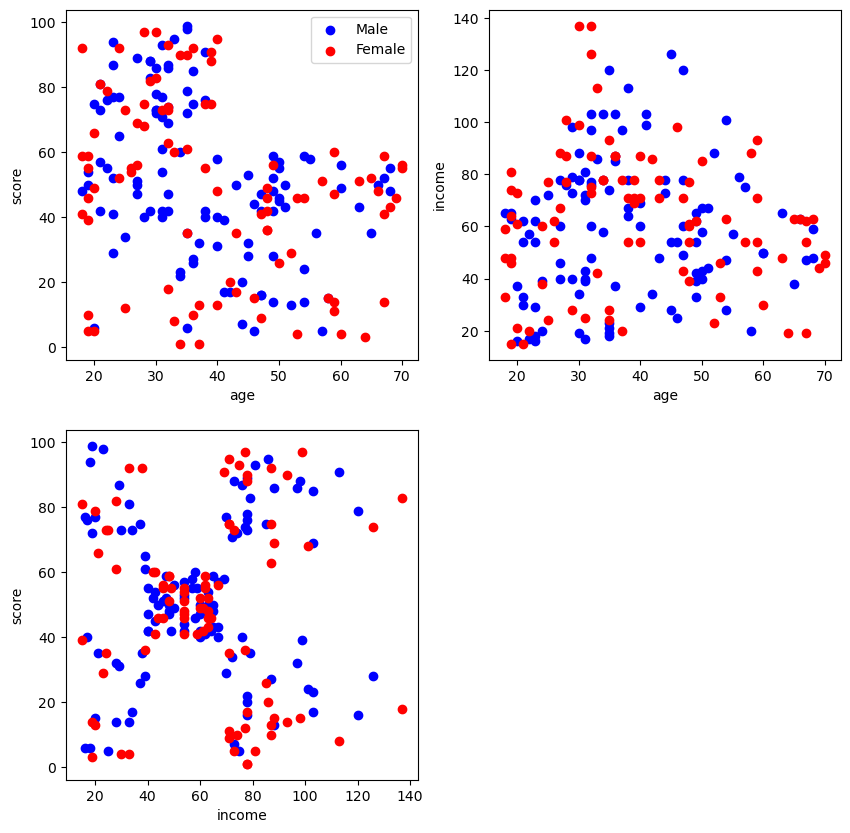

In [6]:
# I thought gender might affect the clustering, but it seems I may be wrong. However, it still needs to be proven.
females, males = df[df.gender == 'Female'], df[df.gender == 'Male']

fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1, xlabel='age', ylabel='score')
plt.scatter(females.age, females.score, c='b')
plt.scatter(males.age, males.score, c='r')
plt.legend(['Male', 'Female'])

plt.subplot(2, 2, 2, xlabel='age', ylabel='income')
plt.scatter(females.age, females.income, c='b')
plt.scatter(males.age, males.income, c='r')

plt.subplot(2, 2, 3, xlabel='income', ylabel='score')
plt.scatter(females.income, females.score, c='b')
plt.scatter(males.income, males.score, c='r')

## DBSCAN clustering
---
- Finding the optimal eps and min_samples values can be challenging, so I skipped this step and experimented with the data to identify the best parameters.

### Proprocessing

In [7]:
df.gender = LabelEncoder().fit(['Female', 'Male']).transform(df.values[:, 0])

X = df

X_scaled = MinMaxScaler().fit_transform(X)

X[:5], X_scaled[:5]

(   gender   age  income  score
 0       1  19.0    15.0   39.0
 1       1  21.0    15.0   81.0
 2       0  20.0    16.0    6.0
 3       0  23.0    16.0   77.0
 4       0  31.0    17.0   40.0,
 array([[1.        , 0.01923077, 0.        , 0.3877551 ],
        [1.        , 0.05769231, 0.        , 0.81632653],
        [0.        , 0.03846154, 0.00819672, 0.05102041],
        [0.        , 0.09615385, 0.00819672, 0.7755102 ],
        [0.        , 0.25      , 0.01639344, 0.39795918]]))

### Training our model and describing it

In [8]:
dbscan_model = DBSCAN(eps=0.2, min_samples=6).fit(X_scaled)
df['cluster'] =  dbscan_model.labels_

- Wow! This time we can say our clusters are also separated by gender.

In [9]:
df.groupby('cluster').describe().T

cluster               -1          0           1          2          3  \
gender count   27.000000  10.000000   93.000000  35.000000  10.000000   
       mean     0.666667   1.000000    0.000000   1.000000   1.000000   
       std      0.480384   0.000000    0.000000   0.000000   0.000000   
       min      0.000000   1.000000    0.000000   1.000000   1.000000   
       25%      0.000000   1.000000    0.000000   1.000000   1.000000   
       50%      1.000000   1.000000    0.000000   1.000000   1.000000   
       75%      1.000000   1.000000    0.000000   1.000000   1.000000   
       max      1.000000   1.000000    0.000000   1.000000   1.000000   
age    count   27.000000  10.000000   93.000000  35.000000  10.000000   
       mean    39.888889  25.800000   37.322581  52.257143  21.600000   
       std     15.636086   5.865151   13.105891  10.874533   3.687818   
       min     19.000000  18.000000   18.000000  34.000000  18.000000   
       25%     29.000000  21.250000   28.000000  44.500000  19.000000   
       50%     35.000000  24.500000   33.000000  49.000000  19.500000   
       75%     55.500000  30.500000   49.000000  61.000000  25.500000   
       max     67.000000  35.000000   68.000000  70.000000  27.000000   
income count   27.000000  10.000000   93.000000  35.000000  10.000000   
       mean    65.222222  27.400000   56.279570  62.457143  56.900000   
       std     44.026507   8.329332   22.464158  17.012699   7.415449   
       min     15.000000  15.000000   16.000000  23.000000  46.000000   
       25%     20.000000  21.750000   40.000000  51.500000  49.500000   
       50%     73.000000  26.500000   57.000000  62.000000  59.500000   
       75%    101.000000  31.750000   70.000000  77.500000  61.750000   
       max    137.000000  42.000000  120.000000  98.000000  67.000000   
score  count   27.000000  10.000000   93.000000  35.000000  10.000000   
       mean    26.555556  75.900000   56.537634  37.171429  52.600000   
       std     30.027338  11.454742   20.281475  17.515515   5.758086   
       min      3.000000  60.000000    5.000000   1.000000  41.000000   
       25%      6.000000  67.750000   42.000000  23.000000  49.750000   
       50%     14.000000  76.000000   53.000000  43.000000  54.500000   
       75%     31.500000  81.750000   74.000000  50.000000  55.750000   
       max     99.000000  92.000000   95.000000  60.000000  59.000000   

cluster               4           5  
gender count  15.000000   10.000000  
       mean    1.000000    0.000000  
       std     0.000000    0.000000  
       min     1.000000    0.000000  
       25%     1.000000    0.000000  
       50%     1.000000    0.000000  
       75%     1.000000    0.000000  
       max     1.000000    0.000000  
age    count  15.000000   10.000000  
       mean   33.933333   41.000000  
       std     4.479583    5.906682  
       min    27.000000   34.000000  
       25%    31.000000   36.250000  
       50%    34.000000   41.000000  
       75%    38.500000   44.000000  
       max    40.000000   52.000000  
income count  15.000000   10.000000  
       mean   80.266667   88.400000  
       std     9.238635   11.432896  
       min    69.000000   73.000000  
       25%    72.000000   78.000000  
       50%    78.000000   87.500000  
       75%    87.000000   98.500000  
       max    99.000000  103.000000  
score  count  15.000000   10.000000  
       mean   84.200000   21.600000  
       std    11.245316    9.335714  
       min    63.000000    7.000000  
       25%    75.000000   16.250000  
       50%    90.000000   21.000000  
       75%    92.500000   26.000000  
       max    97.000000   39.000000

### Plotting the Segmentation Results of Our Model
- Since our clusters are also separated by gender, it's better to separate them before plotting.

In [10]:
females, males = df[df.gender == 0], df[df.gender == 1]

females_labels = females['cluster'].unique()
males_labels = males['cluster'].unique()
females_labels, males_labels

(array([-1,  1,  5], dtype=int64), array([-1,  0,  2,  3,  4], dtype=int64))

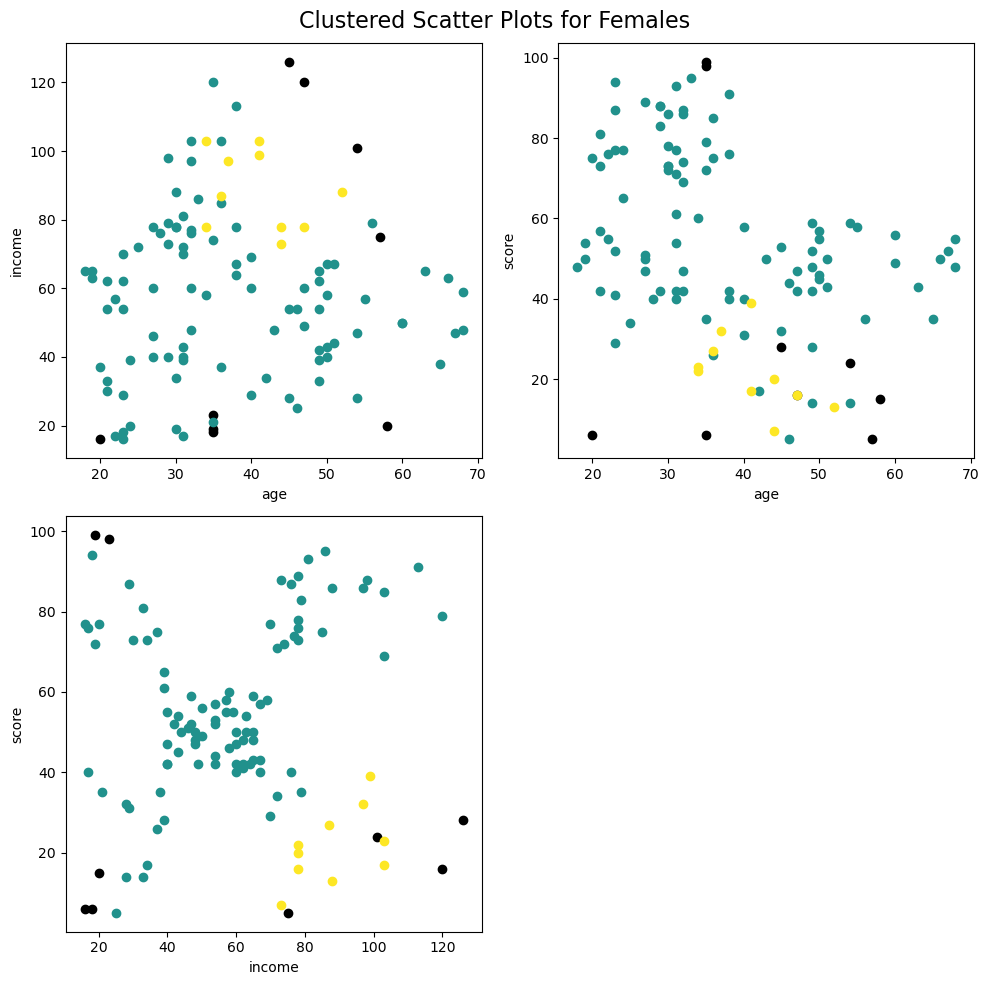

In [11]:
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Clustered Scatter Plots for Females', fontsize=16)

colors = plt.cm.viridis(np.linspace(0, 1, len(females_labels)))

for cluster, color in zip(females_labels, colors):
    color = 'k' if cluster == -1 else color
    
    sub_df = females[females.cluster == cluster]
    
    age, income, score = sub_df[['age', 'income', 'score']].T.to_numpy()

    plt.subplot(2, 2, 1, xlabel='age', ylabel='income')
    plt.scatter(age, income, color=color)

    plt.subplot(2, 2, 2, xlabel='age', ylabel='score')
    plt.scatter(age, score, color=color)

    plt.subplot(2, 2, 3, xlabel='income', ylabel='score')
    plt.scatter(income, score, color=color)

plt.tight_layout()

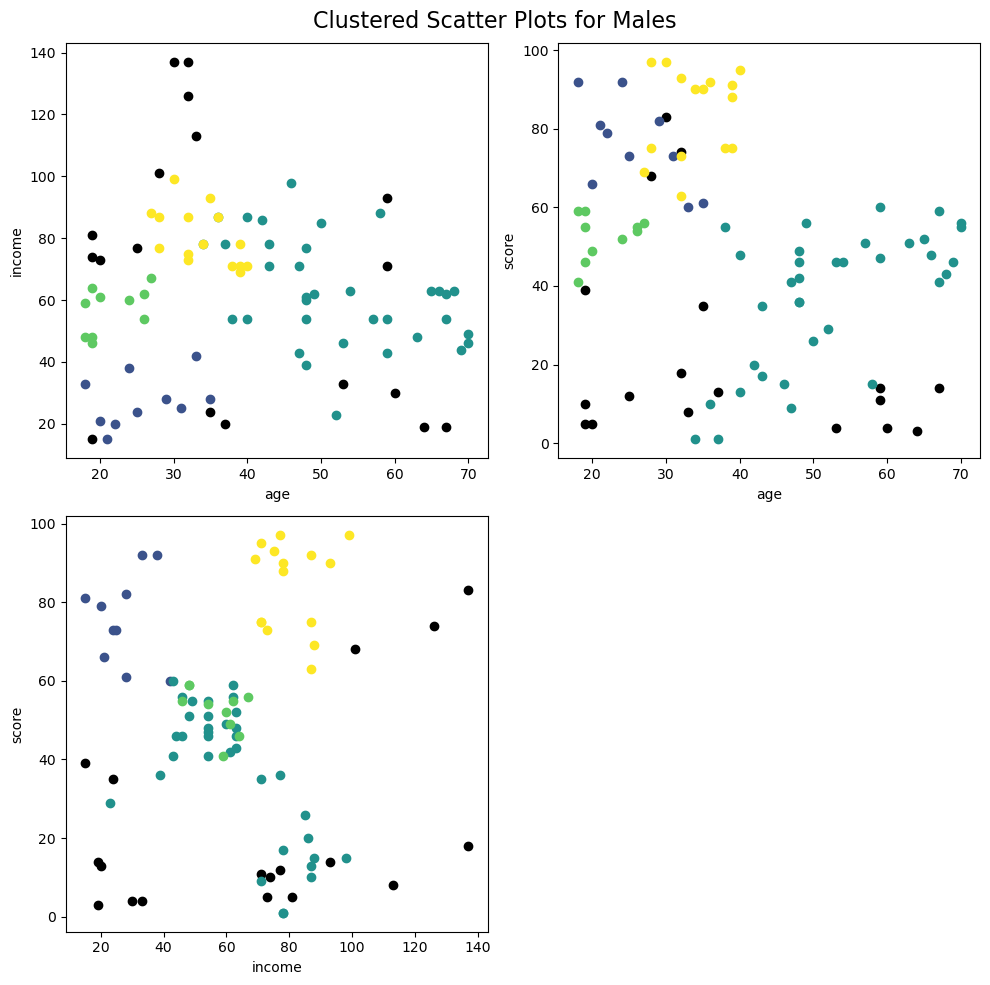

In [12]:
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Clustered Scatter Plots for Males', fontsize=16)

colors = plt.cm.viridis(np.linspace(0, 1, len(males_labels)))

for cluster, color in zip(males_labels, colors):
    color = 'k' if cluster == -1 else color
    
    sub_df = males[males.cluster == cluster]
    
    age, income, score = sub_df[['age', 'income', 'score']].T.to_numpy()

    plt.subplot(2, 2, 1, xlabel='age', ylabel='income')
    plt.scatter(age, income, color=color)

    plt.subplot(2, 2, 2, xlabel='age', ylabel='score')
    plt.scatter(age, score, color=color)

    plt.subplot(2, 2, 3, xlabel='income', ylabel='score')
    plt.scatter(income, score, color=color)

plt.tight_layout()

## Excluding the `gender` Field
---
- These results are not satisfactory, in my opinion; perhaps DBSCAN is not an appropriate method for segmenting these customers.
- I tried again, but this time I did not include the 'gender' feature in the model.
- As a result, I need to adjust eps and min_samples again to align with our dataset, but unfortunately, it did not yield good results.

In [13]:
dbscan_model = DBSCAN(eps=0.1, min_samples=4).fit(X_scaled[:, 1:])
df['cluster'] =  dbscan_model.labels_

df.groupby('cluster').describe().T

cluster               -1          0          1          2          3  \
gender count   77.000000  10.000000  27.000000  28.000000  20.000000   
       mean     0.441558   0.300000   0.407407   0.357143   0.600000   
       std      0.499829   0.483046   0.500712   0.487950   0.502625   
       min      0.000000   0.000000   0.000000   0.000000   0.000000   
       25%      0.000000   0.000000   0.000000   0.000000   0.000000   
       50%      0.000000   0.000000   0.000000   0.000000   1.000000   
       75%      1.000000   0.750000   1.000000   1.000000   1.000000   
       max      1.000000   1.000000   1.000000   1.000000   1.000000   
age    count   77.000000  10.000000  27.000000  28.000000  20.000000   
       mean    38.766234  22.200000  24.074074  46.964286  64.350000   
       std     12.505679   1.549193   4.937501   4.467845   4.545385   
       min     18.000000  20.000000  18.000000  38.000000  55.000000   
       25%     31.000000  21.000000  19.000000  45.750000  60.000000   
       50%     36.000000  22.000000  23.000000  48.000000  66.000000   
       75%     48.000000  23.000000  27.000000  50.000000  68.000000   
       max     67.000000  25.000000  33.000000  54.000000  70.000000   
income count   77.000000  10.000000  27.000000  28.000000  20.000000   
       mean    61.558442  24.100000  53.666667  54.785714  54.100000   
       std     35.667136   7.723701   9.302605   8.870914   7.275771   
       min     15.000000  15.000000  39.000000  39.000000  43.000000   
       25%     28.000000  17.750000  46.000000  47.500000  48.000000   
       50%     70.000000  22.000000  54.000000  54.000000  54.000000   
       75%     87.000000  29.750000  62.000000  62.000000  62.250000   
       max    137.000000  37.000000  67.000000  67.000000  65.000000   
score  count   77.000000  10.000000  27.000000  28.000000  20.000000   
       mean    35.987013  77.900000  51.074074  47.142857  51.000000   
       std     28.391758   4.280446   6.082294   5.854497   5.477226   
       min      1.000000  73.000000  41.000000  36.000000  41.000000   
       25%     14.000000  75.250000  47.000000  42.000000  47.750000   
       50%     29.000000  77.000000  52.000000  46.000000  51.000000   
       75%     60.000000  80.500000  55.000000  50.500000  55.250000   
       max     99.000000  87.000000  61.000000  59.000000  60.000000   

cluster                4          5  
gender count   32.000000   6.000000  
       mean     0.437500   0.666667  
       std      0.504016   0.516398  
       min      0.000000   0.000000  
       25%      0.000000   0.250000  
       50%      0.000000   1.000000  
       75%      1.000000   1.000000  
       max      1.000000   1.000000  
age    count   32.000000   6.000000  
       mean    32.750000  43.833333  
       std      3.868817   2.786874  
       min     27.000000  40.000000  
       25%     30.000000  42.250000  
       50%     32.000000  43.500000  
       75%     36.000000  46.250000  
       max     40.000000  47.000000  
income count   32.000000   6.000000  
       mean    80.875000  79.666667  
       std      9.300538   5.955390  
       min     69.000000  71.000000  
       25%     73.750000  78.000000  
       50%     78.000000  78.000000  
       75%     87.000000  84.000000  
       max    103.000000  87.000000  
score  count   32.000000   6.000000  
       mean    83.625000  15.833333  
       std      8.739048   4.262237  
       min     69.000000   9.000000  
       25%     75.000000  13.750000  
       50%     86.000000  16.500000  
       75%     90.250000  19.250000  
       max     97.000000  20.000000

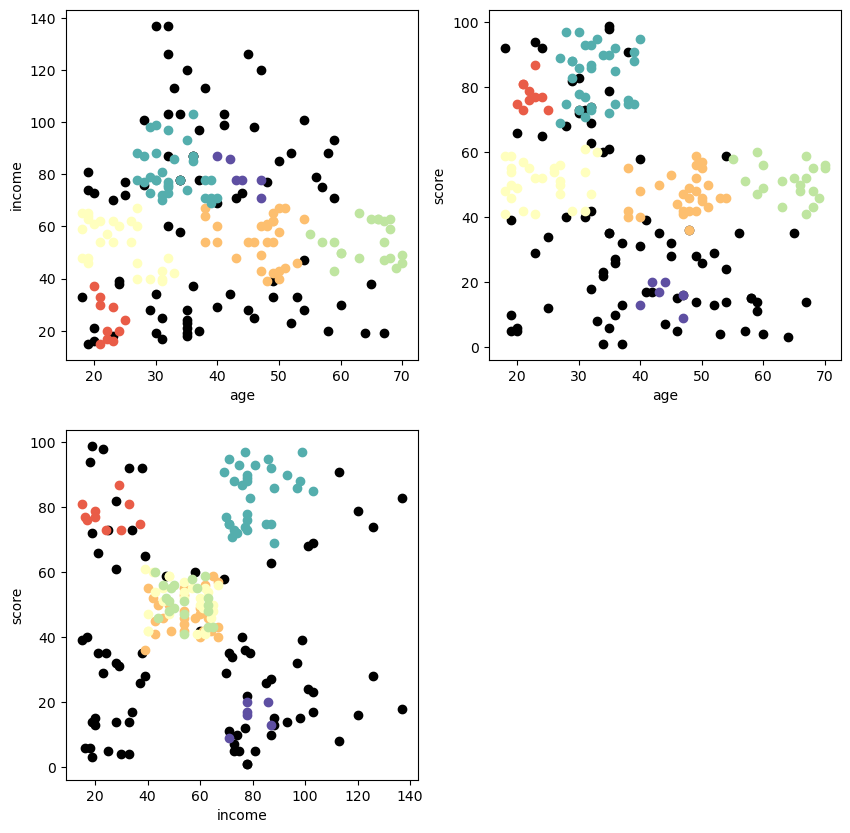

In [14]:
labels = df['cluster'].unique()

fig = plt.figure(figsize=(10, 10))

colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

for cluster, color in zip(labels, colors):
    color = 'k' if cluster == -1 else color

    sub_df = df[df.cluster == cluster]
    
    age, income, score = sub_df[['age', 'income', 'score']].T.to_numpy()

    plt.subplot(2, 2, 1, xlabel='age', ylabel='income')
    plt.scatter(age, income, color=color)

    plt.subplot(2, 2, 2, xlabel='age', ylabel='score')
    plt.scatter(age, score, color=color)

    
    plt.subplot(2, 2, 3, xlabel='income', ylabel='score')
    plt.scatter(income, score, color=color)

---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>